In [27]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

In [28]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [29]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [30]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [31]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

# fit
scaler.fit(df_market_data)

scaled_data = scaler.transform(df_market_data)

In [32]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)
df_scaled.index = df_market_data.index # to bring back the coins

df_scaled.head()

# Copy the crypto names from the original data
df_scaled["coin_id"] = df_market_data.index  # Replace "Ticker" with the actual column name if it's different

# Set the coinid column as index
df_scaled = df_scaled.set_index("coin_id")  # Replace "coinid" with the actual column name if it's different

# Display sample data
df_scaled.head(20)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [37]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))  # This will create a list [1, 2, 3, ..., 11]




In [38]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
# Loop through each value of k
for k in k_values:
    # Create a KMeans model with the current k value
    k_model = KMeans(n_clusters=k, random_state=1)
    
    # Fit the model to the scaled data
    k_model.fit(df_scaled)
    
    # Append the inertia value to the inertia list
    inertia.append(k_model.inertia_)

In [44]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,       # List of k-values
    "inertia": inertia   # List of inertia values corresponding to each k
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head(12)

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


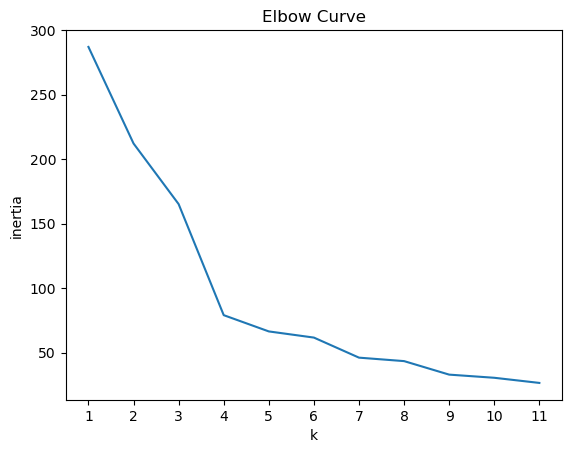

In [42]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** #3 because it has the steepest elbow section.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [45]:
# Initialize the K-Means model using the best value for k
# K3 is the best
best_k = 3
model = KMeans(n_clusters=best_k, random_state=0)

In [48]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)

KMeans(n_clusters=3, random_state=0)

In [49]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model.predict(df_scaled)

# Print the resulting array of cluster values.
print(clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 0 0 0 2
 0 0 0 0]


In [50]:
# Create a copy of the DataFrame
df_sub2 = df_scaled.copy()

In [51]:
# Add a new column to the DataFrame with the predicted clusters
df_sub2['clusters'] = clusters

# Display sample data
df_sub2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


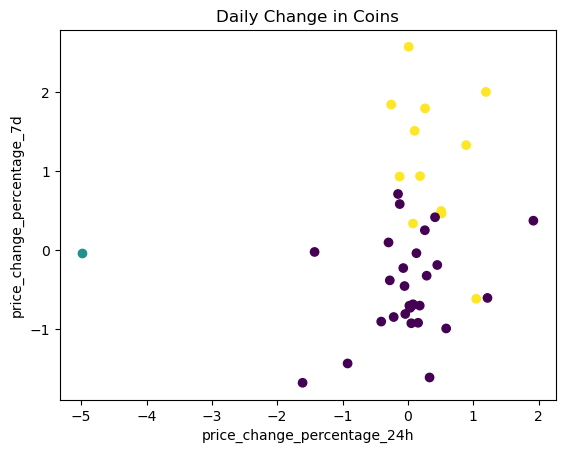

In [60]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

plt.scatter(df_sub2.price_change_percentage_24h, df_sub2.price_change_percentage_7d, c=df_sub2.clusters)
plt.ylabel("price_change_percentage_7d")
plt.xlabel("price_change_percentage_24h")
plt.title("Daily Change in Coins")
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [61]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [89]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

pca_result = pca.fit_transform(df_scaled)

# Convert the PCA results to a DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df.index = df_scaled.index

# View the first five rows of the PCA DataFrame
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [63]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.

explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.3719856  0.34700813 0.17603793]


In [64]:
total_explained_variance = explained_variance.sum()

print(f'Total Explained Variance: {total_explained_variance}')

Total Explained Variance: 0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance: 0.8950316570309842

In [90]:
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [100]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [101]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in range(1, 12):  # Assuming you want k values from 1 to 11
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # 2. Fit the model to the data using `df_market_data_pca`
    k_model.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

In [143]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)

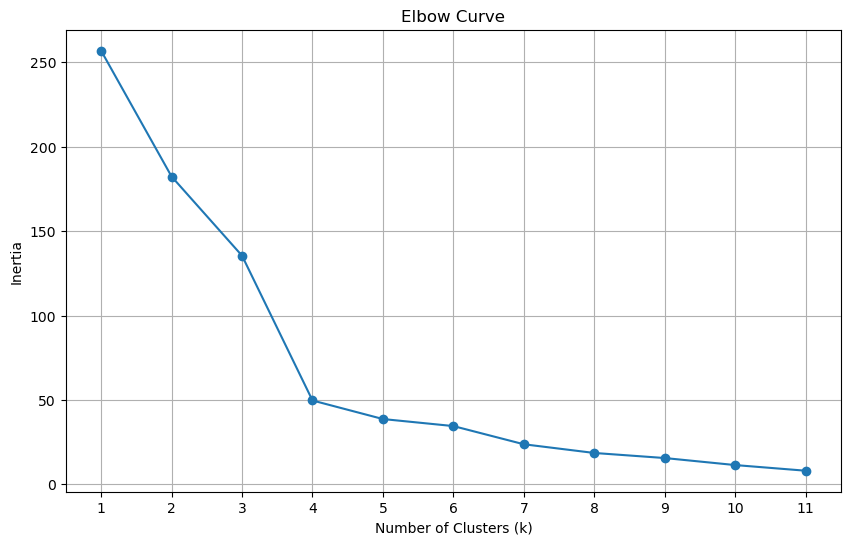

In [144]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k'])
plt.grid()
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** #3 is the best.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not differ.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [145]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=3, random_state=0)

In [146]:
# Fit the K-Means model using the PCA data
model.fit(pca_data)

KMeans(n_clusters=3, random_state=0)

In [147]:
# Predict the clusters using the PCA data
cluster_labels = model.predict(pca_data)

# Print the resulting array of cluster values
print(cluster_labels)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 0 0 0 2
 0 0 0 0]


In [148]:
print(len(pca_data))
print(len(cluster_labels))

41
41


In [149]:
print(type(cluster_labels))
print(len(cluster_labels))

<class 'numpy.ndarray'>
41


In [150]:
print(type(pca_data))
print(len(pca_data))

<class 'numpy.ndarray'>
41


In [151]:
# Create a copy of the DataFrame with the PCA data
df_sub2 = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

In [152]:
# Add a new column to the DataFrame with the predicted clusters
df_sub2['clusters'] = cluster_labels

In [153]:
# Display sample data
df_sub2.head()

,PC1,PC2,PC3,clusters
0,-0.600667,0.842760,0.461595,2
1,-0.458261,0.458466,0.952877,2
2,-0.433070,-0.168126,-0.641752,0
3,-0.471835,-0.222660,-0.479053,0
4,-1.157800,2.041209,1.859715,2


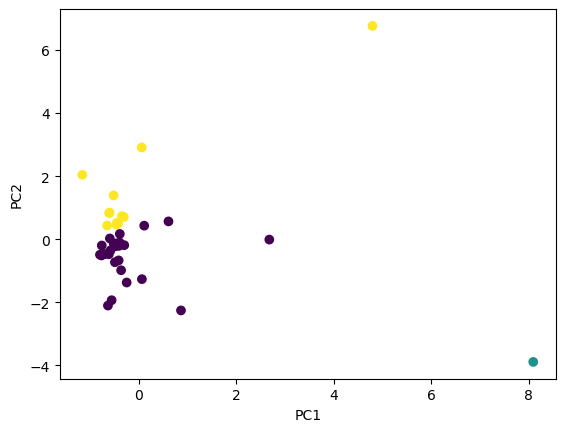

In [154]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

plt.scatter(df_sub2.PC1, df_sub2.PC2, c=df_sub2.clusters)
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.show()

In [155]:
df_sub2.reset_index().hvplot.scatter(
    width=800,
    height=400,
    x="PC1",
    y="PC2",
    color="clusters",
    hover_cols="coin_id"
)

:Scatter   [PC1]   (PC2,clusters)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [156]:
# Composite plot to contrast the Elbow curves

# Assuming df_elbow and df_elbow_pca are your DataFrames for the original and PCA elbow curves
elbow_curve_original = df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve Comparison",
    label="Original Data",
    color='blue'
)

elbow_curve_pca = df_elbow.hvplot.line(
    x="k",
    y="inertia",
    label="PCA Data",
    color='orange'
)

# Combine the two plots
composite_plot = elbow_curve_original + elbow_curve_pca

composite_plot

:Layout
   .Curve.Original_Data :Curve   [k]   (inertia)
   .Curve.PCA_Data      :Curve   [k]   (inertia)

In [159]:
# Composite plot to contrast the clusters

original_cluster_plot = df_sub2.hvplot.scatter(
    x="feature_1",
    y="feature_2",
    by="customer_segments",
    title="Cluster Comparison",
    label="Original Data",
    color='blue'
)

pca_cluster_plot = df_sub2.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="customer_segments",
    label="PCA Data",
    color='orange'
)

# Combine the two plots
composite_cluster_plot = original_cluster_plot + pca_cluster_plot

composite_cluster_plot

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['customer_segments', 'feature_1', 'feature_2']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 